Improve Diabetes Prediction Accuracy: The primary objective is to develop robust machine learning models, such as Random Forest and Decision Tree, to accurately predict the presence or absence of diabetes based on patient data. By maximizing prediction accuracy, healthcare professionals can make informed decisions and provide appropriate interventions to patients, leading to improved health outcomes.



Minimize False Predictions: While accurately predicting diabetes is crucial, minimizing false predictions is equally important to avoid misdiagnoses and unnecessary treatments. By optimizing the models to reduce false positive and false negative rates, healthcare providers can ensure that patients receive timely and appropriate care, while minimizing the risk of unnecessary medical interventions and associated costs.

In [1]:
"""

Constraints :- 'Number of times pregnant',
                'Plasma glucose concentration',
                'Diastolic blood pressure', 
                'Triceps skin fold thickness',
                '2-Hour serum insulin', 
                'Body mass index', 
                'Diabetes pedigree function',
                'Age (years)', 
                'Class variable'

"""

"\n\nConstraints :- 'Number of times pregnant',\n                'Plasma glucose concentration',\n                'Diastolic blood pressure', \n                'Triceps skin fold thickness',\n                '2-Hour serum insulin', \n                'Body mass index', \n                'Diabetes pedigree function',\n                'Age (years)', \n                'Class variable'\n\n"

In [127]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("D:\\1-Data Science\\6 - Machine Learning\\Decision Tree\\Data\\Diabetes.csv")
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [81]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [82]:
df.rename(columns= lambda x: x.strip(), inplace=True)

In [83]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)', 'Class variable'],
      dtype='object')

In [84]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age (years)                   768 non-null    int64  
 8   Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [86]:
len(df.columns)

9

In [87]:
splitted = df.iloc[:,:8]
splitted

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [88]:
X = splitted.columns
X

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)'],
      dtype='object')

In [89]:
col_name = []

col_name.append(X)
col_name

[Index(['Number of times pregnant', 'Plasma glucose concentration',
        'Diastolic blood pressure', 'Triceps skin fold thickness',
        '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
        'Age (years)'],
       dtype='object')]

In [90]:
y = df['Class variable']
y

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
763     NO
764     NO
765     NO
766    YES
767     NO
Name: Class variable, Length: 768, dtype: object

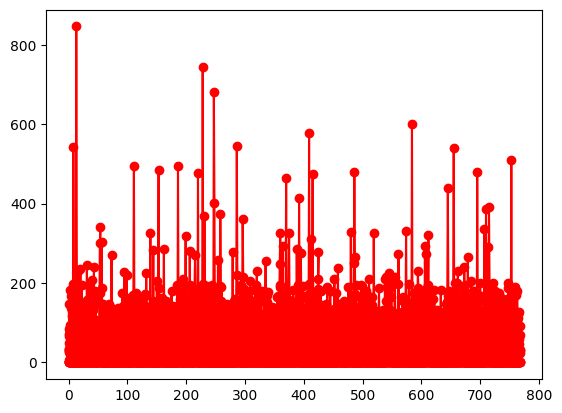

In [91]:
for i in col_name:
    plt.plot(df[i],'ro-')
    

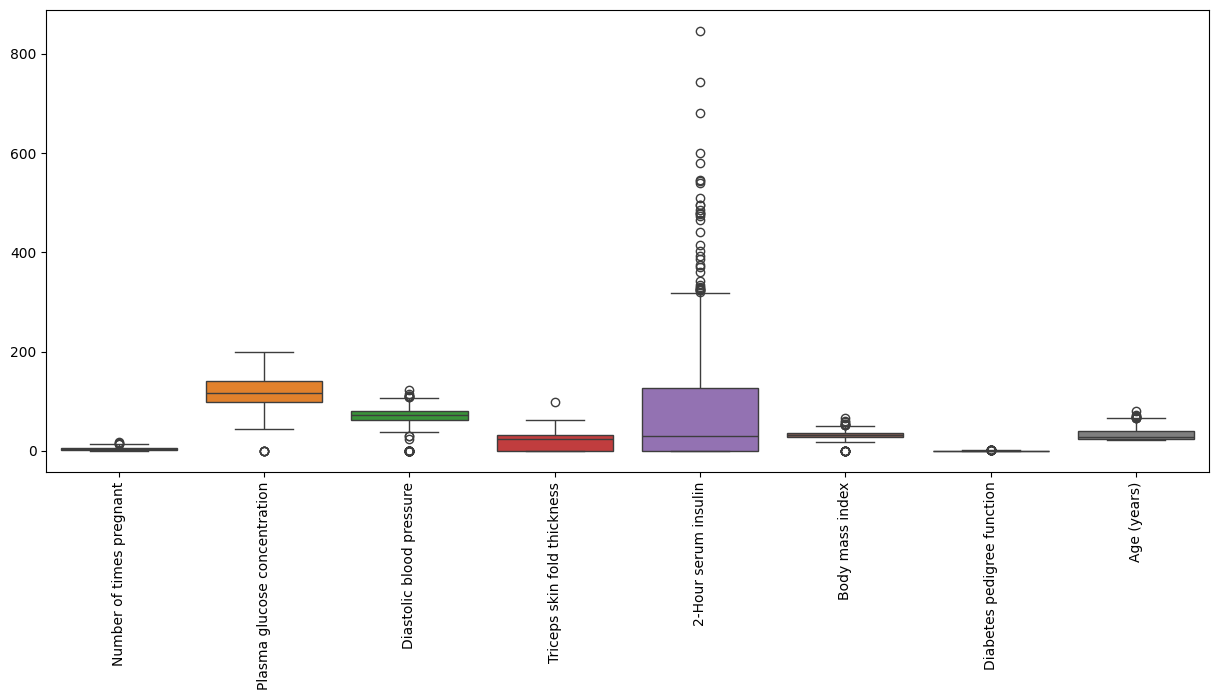

In [95]:
for i in col_name:
    plt.figure(figsize=(15,6))
    plt.xticks(rotation = 90)
    sns.boxplot(df[i])

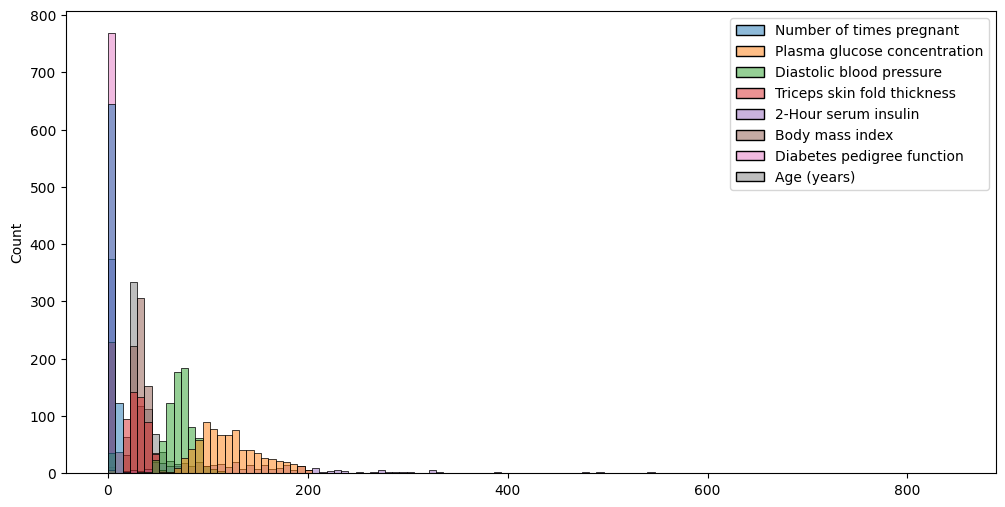

In [94]:
for i in col_name:
    plt.figure(figsize=(12,6))
    sns.histplot(df[i])

In [99]:
def norm_funct(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [101]:
x = norm_funct(splitted)
x

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


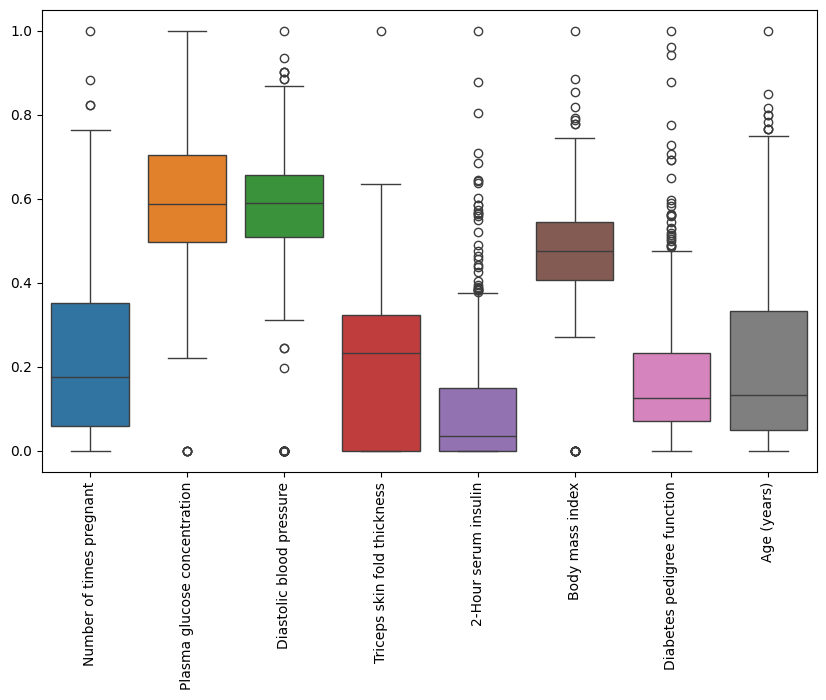

In [104]:
for i in col_name:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation = 90)
    sns.boxplot(x)

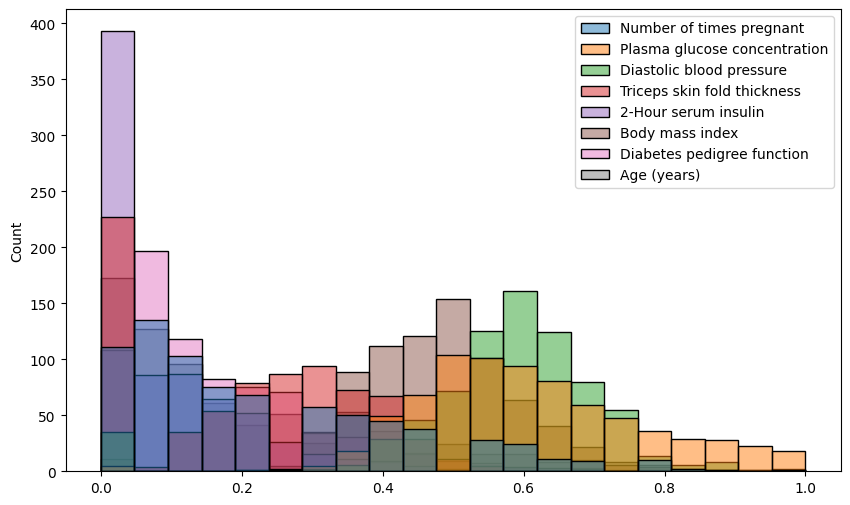

In [106]:
for i in col_name:
    plt.figure(figsize = (10,6))
    sns.histplot(x)

In [109]:
x_= np.array(x)
x_

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [110]:
y_ = np.array(y)
y_

array(['YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test =train_test_split(x_, y_, test_size=0.2) 

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
model = DecisionTreeClassifier()

In [117]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [123]:
pred = model.predict(X_test)
pred

array(['NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
print(accuracy_score(pred, y_test))

0.7077922077922078
